**Table of contents**<a id='toc0_'></a>    
- [Calculs](#toc1_)    
  - [泰勒级数(Taylor Series)](#toc1_1_)    
    - [多项式近似(Polynomial Approximantion)](#toc1_1_1_)    
    - [展开点(Expansion point)](#toc1_1_2_)    
  - [极限(Limits)](#toc1_2_)    
    - [函数的连续性](#toc1_2_1_)    
    - [泰勒级数用于极限计算](#toc1_2_2_)    
    - [洛必达法则(l'Hopital's rule)](#toc1_2_3_)    
  - [大O记法(Big-O Notation)](#toc1_3_)    
    - [误差分析](#toc1_3_1_)    
  - [导数](#toc1_4_)    
    - [切线(Tangent line)](#toc1_4_1_)    
    - [导数(Derivative)](#toc1_4_2_)    
    - [线性近似(Linear approximation)](#toc1_4_3_)    
  - [牛顿迭代法(Newton's Itervative Method)](#toc1_5_)    
    - [求二次根](#toc1_5_1_)    
    - [牛顿迭代法(Newton's Itervative Method)](#toc1_5_2_)    
  - [优化](#toc1_6_)    
    - [高阶导数(Higher Derivatives)](#toc1_6_1_)    
    - [优化问题(Optimization Problem)](#toc1_6_2_)    
    - [关键点(Critical Points)](#toc1_6_3_)    
    - [线性回归(Linear Regression)](#toc1_6_4_)    
  - [不定积分](#toc1_7_)    
    - [常微分方程(Ordinary Differential Equations,ODE)](#toc1_7_1_)    
    - [不定积分(Indefinite Integral)](#toc1_7_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Calculs](#toc0_)

## <a id='toc1_1_'></a>[泰勒级数(Taylor Series)](#toc0_)
给出函数$f(x)$在$x=0$处展开的泰勒级数的定义：
$$f(x)=f(0)+\frac{f'(0)}{1!}x+\frac{f''(0)}{2!}x^2+\frac{f'''(0)}{3!}x^3+\cdots=\sum_{k=0}^{\infty}{\frac{f^{(k)}(0)}{k!}x^k}
$$
$f^{(k)}(0)$表示函数$f$的$k$次导函数在点$x=0$处的取值。故可以得到：
$$\begin{split}
e^x&=e^{(0)}+\frac{e'^{(0)}}{1!}x+\frac{e''^{(0)}}{2!}x^2+\frac{e'''^{(d)}}{3!}x^3+\cdots \\ &=1+\frac{x}{1!}+\frac{x^2}{2!}+\frac{x^3}{3!}+\cdots=\sum_{k=0}^{\infty}{\frac{x^k}{k!}}\end{split}
$$

### <a id='toc1_1_1_'></a>[多项式近似(Polynomial Approximantion)](#toc0_)
泰勒级数可以把非常复杂的函数转变成无限项的和的形式。通常，我们可以**只计算
泰勒级数的前几项之和**，便能够获得**原函数的局部近似**了。在做这样的多项式近似
时，我们所计算的项越多，则近似的结果越精确。

0


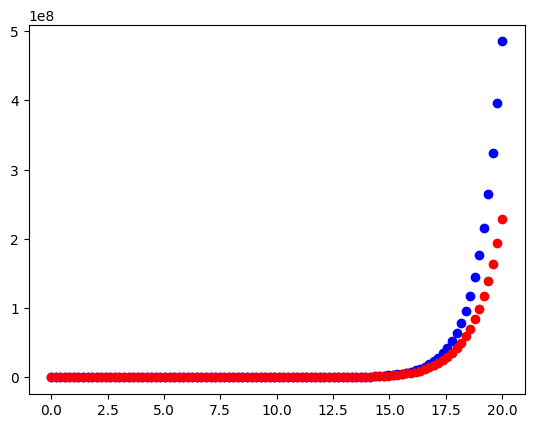

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from math import e
from sympy import *
import sympy

x = sympy.Symbol('x')
exp = e**x

"""多项式近似求exp()在x=0处展开的泰勒级数前20项之和"""
sums = 0
for i in range(20):
    numerator = exp.diff(x, i)  # 求i次导函数
    numerator = numerator.evalf(subs={x: 0}) #计算导函数在x=0处的值
    denominator = np.math.factorial(i) # 分母
    sums += numerator/denominator*x**i
print(exp.evalf(subs={x: 0})-sums.evalf(subs={x: 0}))

xvals = np.linspace(0, 20, 100)
for xval in xvals:
    plt.plot(xval, exp.evalf(subs={x: xval}), 'bo',\
        xval, sums.evalf(subs={x:xval}), 'ro')

表明指数函数$e^x$在$x=0$处展开的泰勒级数只取前20项的话，在输入值越接近展
开点($x=0$)处的近似效果就越好。

让我们看看采用不同项数所计算出来的近似结果之间的差异：

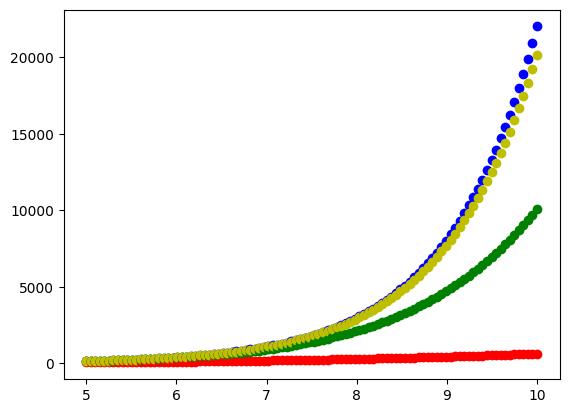

In [10]:
def polyApprox(func, num_terms):
    sums = 0
    for i in range(num_terms):
        numerator = func.diff(x, i)
        numerator = numerator.evalf(subs = {x:0})
        denominator = np.math.factorial(i)
        sums += numerator/denominator*x**i
    return sums

sum5 = polyApprox(exp, 5)
sum10 = polyApprox(exp, 10)
# 利用sympy我们也可以获得泰勒级数：
sum15 = exp.series(x,0,15).removeO()

xvals = np.linspace(5, 10, 100)
for xval in xvals:
    plt.plot(xval, exp.evalf(subs={x:xval}), 'bo',
            xval, sum5.evalf(subs={x:xval}), 'ro',
            xval, sum10.evalf(subs={x:xval}), 'go',
            xval, sum15.evalf(subs={x:xval}), 'yo')

可以明显看出，在输入值远离展开点$x=0$处时，用越多项数获得的近似结果越
接近真实值。
### <a id='toc1_1_2_'></a>[展开点(Expansion point)](#toc0_)
上面我们获得的泰勒级数都是围绕着$x=0$处获得的，我们发现多项式近似也只在$x=0$处较为准确。如果我们希望在其他位置获得类似的多项式近似，则可以在不同的展开点（例如$x=a$）获得泰勒级数：

In [11]:
"""利用sympy的series()获取泰勒展开式"""
def taylorExpansion(func,var,expPoint,numTerms):
        return func.series(var,expPoint,numTerms)

print(taylorExpansion(sympy.tanh(x),x,2,3))

tanh(2) + (1 - tanh(2)**2)*(x - 2) + (x - 2)**2*(-tanh(2) + tanh(2)**3) + O((x - 2)**3, (x, 2))


***

## <a id='toc1_2_'></a>[极限(Limits)](#toc0_)
函数的极限，描述的是输入值在接近一个特定值时函数的表现。

定义：我们若要称函数$f(x)$在$x=a$处的极限为$L$即：$\lim_{x\to a}{f(x)}=L$，则需要：对任意一个$\epsilon>0$，我们要都能找到一个$\delta>0$使得当$x$的取值满足:$0<|x-a|<\delta$时$|f(x)-L|<\epsilon$

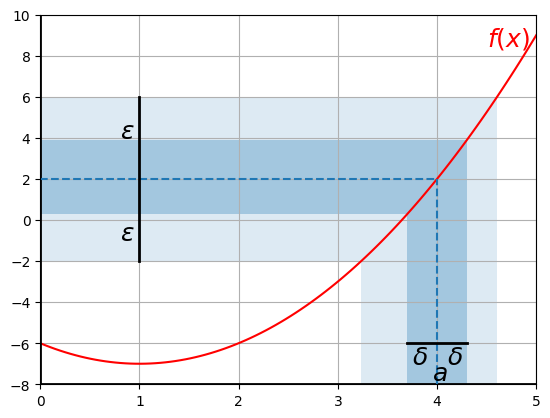

In [13]:
f = lambda x: x**2-2*x-6
x = np.linspace(0,5,100)
y = f(x)

plt.plot(x,y,'red')
plt.grid('off')

l = plt.axhline(-8,0,1,linewidth = 2, color = 'black')
l = plt.axvline(0,0,1,linewidth = 2, color = 'black')
l = plt.axhline(y=2,xmin=0,xmax=0.8,linestyle="--")
l = plt.axvline(x=4,ymin=0,ymax=float(5)/9, linestyle = "--")
l = plt.axhline(-6,3.7/5,4.3/5,linewidth = 2, color = 'black')
l = plt.axvline(1,6.0/18,14.0/18,linewidth = 2, color = 'black')

p = plt.axhspan(-2,6,0,(1+sqrt(13))/5,alpha = 0.15, ec = 'none')
p = plt.axvspan((1+sqrt(5)),(1+sqrt(13)),0,1.0/3,alpha = 0.15, ec
= 'none')
p = plt.axhspan(f(3.7),f(4.3),0,4.3/5,alpha = 0.3, ec = 'none')
p = plt.axvspan(3.7,4.3,0,(f(3.7)+8)/18,alpha = 0.3, ec = 'none')

plt.axis([0,5,-8,10])
plt.text(0.8,-1,r"$\epsilon$", fontsize = 18)
plt.text(0.8,4,r"$\epsilon$", fontsize = 18)
plt.text(3.75,-7.0,r"$\delta$", fontsize = 18)
plt.text(4.1,-7.0,r"$\delta$", fontsize = 18)
plt.text(3.95,-7.8,r"$a$", fontsize = 18)
plt.text(4.5,8.5,r"$f(x)$", fontsize = 18,color="red")
plt.show()


下面尝试用上面的定义来证明 :$\lim_{x\to 4}{x^2-2x-6}=2$

依据定义，我们需要证明的是：对于任意$\epsilon>0$,能找到一个$\delta$使得：$0<|x-4|<\delta$时有$|f(x)-2|<\epsilon$

注意到:
$$|f(x)-2|=|x^2-2x-6-2|=|(x-4)(x+2)|=|x-4| \cdot|x+2|$$
其中我们已经知道$|x-4|<\delta$，依三角不等式有：
$$|x+2|=|x-4+6|\le |x-4|+6<\delta +6$$
因此
$$|f(x)-2|=|x-4|\cdot|x+2|<\delta\cdot (\delta+6)$$
现在我们只需要找到一个$\delta$满足$\delta\cdot(\delta+6)\leq\epsilon$即可,动用一些中学时候的二元一次方程知识应该很容易证明这样的$\delta>0$是存在的。

或者我们只要令$\delta=min(1, \frac{\epsilon}{7})$即可使得$\delta\leq\frac{\epsilon}{7}$且$\delta+6\leq 7$，因而$\delta\cdot(\delta+6)\leq\epsilon$

Python中求该极限方法如下：

In [17]:
f = lambda x: x**2-2*x-6
x = sympy.Symbol('x',real = True)
y = f(x)
print(y.limit(x, 4))

2


### <a id='toc1_2_1_'></a>[函数的连续性](#toc0_)
极限可以用来判断一个函数是否为连续函数。

当极限$\lim_{x\to a}{f(x)}$存在，且$\lim_{x\to a}{f(x)}=f(a)$时，称函数$f(x)$在点$x=a$处为连续的。当一个函数在其定义域中任何一点处均连续，则称该函数是连续函数。

### <a id='toc1_2_2_'></a>[泰勒级数用于极限计算](#toc0_)
泰勒级数也可以用于计算一些形式比较复杂的函数的极限。这里，仅举一例：
$$\begin{split}
\lim_{x\to 0}{\frac{sin(x)}{x}}&=\lim_{x\to 0}{\frac{\frac{x}{1!}-\frac{x^3}{3!}+\frac{x^5}{5!}-\frac{x^7}{7!}+\cdots}{x}} \\
&=\lim_{x\to 0}{\frac{x(1-\frac{x^2}{3!}+\frac{x^4}{5!}-\frac{x^6}{7!}+\cdots)}{x}} \\
&=\lim_{x\to 0}{1-\frac{x^2}{3!}+\frac{x^4}{5!}-\frac{x^6}{7!}+\cdots} \\
&=1
\end{split}
$$

### <a id='toc1_2_3_'></a>[洛必达法则(l'Hopital's rule)](#toc0_)
利用泰勒级数来计算极限，有时也会陷入困境，例如：求极限的位置是在我们不知
道泰勒展开的位置，或者所求极限是无穷的。通常遇到这些情况我们会使用各种形
式的洛必达法则，读者可以自行回顾一下这些情形，这里我们仅尝试说明$\frac{0}{0}$形式的洛必达法则为何成立。

如果$f$和$g$是连续函数，且$\lim_{x\to a}{f(x)}=0, \lim_{x\to a}{g(x)}=0$。若$\lim_{x\to a}{\frac{f'(x)}{g'(x)}}$存在，则：
$$\lim_{x\to a}{\frac{f(x)}{g(x)}}=\lim_{x\to a}{\frac{f'(x)}{g'(x)}}
$$
若分子分母同时求导后仍然是$\frac{0}{0}$形式，那么便重复该过程，直至问题解决。 运用泰勒级数，我们很容易可以理解洛必达法则为什么会成立:
$$\begin{split}
\lim_{x\to a}{\frac{f(x)}{g(x)}}

&=\lim_{x\to a}{\frac{f(a)+\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+\cdots}
{g(a)+\frac{g'(a)}{1!}(x-a)+\frac{g''(a)}{2!}(x-a)^2+\frac{g'''(a)}{3!}(x-a)^3+\cdots}} \\
&=\lim_{x\to a}{\frac{\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+\cdots}{\frac{g'(a)}{1!}(x-a)+\frac{g''(a)}{2!}(x-a)^2+\frac{g'''(a)}{3!}(x-a)^3+\cdots}} \\
&=\lim_{x\to a}{\frac{f'(a)+\frac{f''(a)}{2!}(x-a)+\frac{f'''(a)}{3!}(x-a)^2+\cdots}{g'(a)+\frac{g''(a)}{2!}(x-a)+\frac{g'''(a)}{3!}(x-a)^2+\cdots}} \\
&=\lim_{x\to a}{\frac{f'(x)}{g'(x)}}
\end{split}
$$



***

## <a id='toc1_3_'></a>[大O记法(Big-O Notation)](#toc0_)
我们已经见过了很多函数，在比较两个函数时，我们可能会想知道，随着输入值$x$的增长或者减少，两个函数的输出值增长或减少的速度究竟谁快谁慢，哪一个函数最终会远远甩开另一个。

通过绘制函数图，可以获得一些直观的感受：

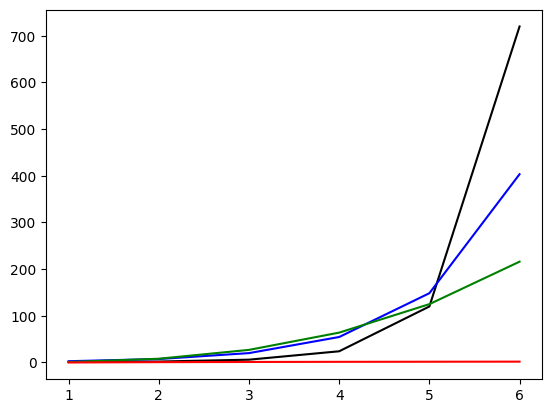

In [19]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
from math import *

x = range(1, 7)

factorial = [np.math.factorial(i) for i in x]   # 阶乘
exponential = [np.e**i for i in x]  # exp函数
polynomial = [i**3 for i in x]  # 三次函数
logarithmic = [np.log(i) for i in x]    # 对数函数

plt.plot(x, factorial, 'black',
         x, exponential, 'blue',
         x, polynomial, 'green',
         x, logarithmic, 'red')

根据上图，当$x\to\infty$时：$x!>e^x>x^3>ln(x)$，要想证明的话，可以取极限， 例如:$\lim_{x\to\infty}{\frac{e^x}{x^3}}=\infty$(用洛必达法则计算)，表明$x\to\infty$时，虽然分子分母都在趋向无限大，但是分子仍然远远凌驾于分母之上，决定了整个表达式的表现。

类似地我们也可以这样看：$\lim_{x\to\infty}{\frac{ln(x)}{x^3}}=0$，表明分母将会远远凌驾于
分子之上。

In [22]:
from sympy.abc import x
# sympy中无限infty用oo表示
print (sympy.E**x/(x**3)).limit(x,sympy.oo)
print (sympy.ln(x)/x**3).limit(x,sympy.oo)

log(x)/x**3


AttributeError: 'NoneType' object has no attribute 'limit'

O(x**2, (x, oo))


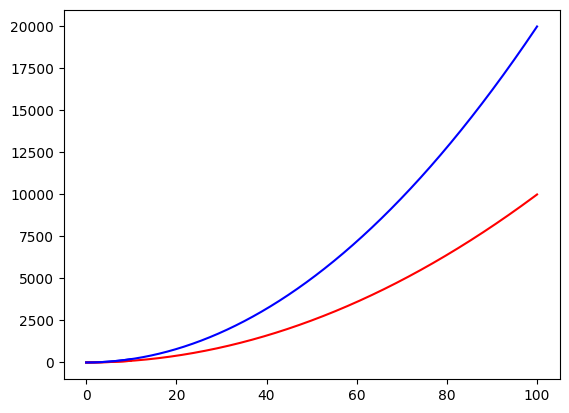

In [18]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
from math import *
from sympy.abc import x

xvals = np.linspace(0, 100, 1000)
f = x*sympy.sqrt(1+x**2)
g = 2*x**2
y1 = [f.evalf(subs={x:xval}) for xval in xvals]
y2 = [g.evalf(subs={x:xval}) for xval in xvals]
plt.plot(xvals[:100], y1[:100], 'r', xvals[:100], y2[:100], 'b')
plt.plot(xvals, y1, 'r', xvals, y2, 'b')

# 判定函数的阶（order)
print(sympy.O(f, (x, sympy.oo)))

### <a id='toc1_3_1_'></a>[误差分析](#toc0_)
注意到在泰勒级数一节，我们利用Sympy取函数泰勒级数的前几项时，代码是这样的：

In [6]:
from math import*
import sympy

x = sympy.Symbol('x')
exp = e**x
sum15 = exp.series(x,0,15).removeO()
print(sum15)

1.14707455977297e-11*x**14 + 1.60590438368216e-10*x**13 + 2.08767569878681e-9*x**12 + 2.50521083854417e-8*x**11 + 2.75573192239859e-7*x**10 + 2.75573192239859e-6*x**9 + 2.48015873015873e-5*x**8 + 0.000198412698412698*x**7 + 0.00138888888888889*x**6 + 0.00833333333333333*x**5 + 0.0416666666666667*x**4 + 0.166666666666667*x**3 + 0.5*x**2 + 1.0*x + 1


其中 removeO() 的作用是让sympy忽略掉级数展开后的大O表示项，不然的话结果类似如下：

In [9]:
print(exp.series(x, 0, 3))

1 + 1.0*x + 0.5*x**2 + O(x**3)


这表示从泰勒级数的第4项起，剩余所有项在$x\rightarrow 0$时是$O(x^3)$的。这表明，当$x\rightarrow 0$时，用$1+x+0.5x^2$来近似$e^x$，我们得到的误差的上限将是$Cx^3$，其中$C$是一个常数。

也就是说大O记法能用来描述我们使用多项式近似时的误差。另外，大O记法也可以直 接参与计算中去，例如我们要计算$cos(x^2)\sqrt{(x)}$在$x\rightarrow 0$时阶$O(x^5)$以内的多项式近似，可以这样：
$$\begin{split}cos(x^2)\sqrt{x}
&=(1-\frac{1}{2}x^4+O(x^6))x^{\frac{1}{2}} \\
&= x^{\frac{1}{2}}- \frac{1}{2}x^{\frac{9}{2}} + O(x^{\frac{13}{2}})
\end{split}
$$


In [10]:
print((sympy.cos(x**2)*sympy.sqrt(x)).series(x,0,5))

sqrt(x) - x**(9/2)/2 + O(x**5)


***

## <a id='toc1_4_'></a>[导数](#toc0_)
### <a id='toc1_4_1_'></a>[切线(Tangent line)](#toc0_)
中学介绍导数的时候，通常会举两个例子，其一是几何意上的例子：对函数关于某一点进行求导，得到的是函数该点处切线的斜率。

选中函数图像中某一点，然后不断地将函数图放大，当我们将镜头拉至足够近后便会发现函数图看上去像一条直线，这条直线就是切线。

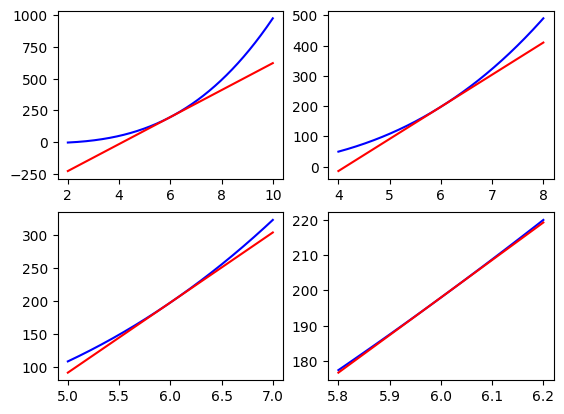

In [14]:
from sympy.abc import x
import matplotlib.pyplot as plt
import numpy as np

# 函数    
f = x**3-2*x-6
# 在x=6处正切于函数的切线
line = 106*x-438
d1 = np.linspace(2,10,1000)
d2 = np.linspace(4,8,1000)
d3 = np.linspace(5,7,1000)
d4 = np.linspace(5.8,6.2,100)
domains = [d1,d2,d3,d4]

# 画图的函数
def makeplot(f,l,d):
    plt.plot(d,[f.evalf(subs={x:xval}) for xval in d],'b',
            d,[l.evalf(subs={x:xval}) for xval in d],'r')

for i in range(len(domains)):
    # 绘制包含多个子图的图表
    plt.subplot(2, 2, i+1)
    makeplot(f,line,domains[i])

plt.show()

另一个是物理中的例子：对路程的时间函数$s(t)$求导可以得到速度的时间函数$v(t)$，再进一步求导可以得到加速度的时间函数$a(t)$这个理解较好，因为导数真正关心的事是：当我们稍微改变一点函数的输入值时，函数的输出值会有怎样变化。在单元时，导数看上去是曲线的切线斜率，但是到更多元时，就很难有“斜率”这样的直观感受了，但是**输出值随着输入值的极小变化而产生的相应变化这样的理解还是成立的**。

### <a id='toc1_4_2_'></a>[导数(Derivative)](#toc0_)
导数的定义如下：
定义1：
$$f'(a)=\frac{\mathrm{d}y}{\mathrm{d}x}\bigg|_{x=a}
=\lim_{x\to a}{\frac{f(x)-f(a)}{x-a}}$$
若该极限不存在，则函数在$x=a$处的导数不存在。

定义2：
$$f'(a)=\frac{\mathrm{d}f}{\mathrm{d}x}\bigg|_{x=a}
=\lim_{h\to a}{\frac{f(a+h)-f(a)}{h}}$$
若该极限不存在，则函数在$x=a$处的导函数不存在。

以上两个定义都是耳熟能详的定义了，就不多说了。

定义3：

函数$f(x)$在$x=a$处的导数$f'(x)$是满足如下条件的常数$C$:

对于在$a$附近输入值的微小变化$h$有，$f(a+h)=f(a)+Ch+O(h^2)$始终成立。 也就是说导数$C$是输出值变化中一阶项的系数。

如果难以理解的话，对上式稍加变化，两边同时除以$h$并同时取极限可以得到：
$$\lim_{h\to 0}{\frac{f(a+h)-f(a)}{h}}=\lim_{h\to 0}C+O(h)=C
$$
便于上面定义2相一致了。

下面举一例，求$cos(x)$在$x=a$处的导数：
$$\begin{split}cos(a+h)&=cos(a)cos(h)-sin(a)sin(h)\\
&=cos(a)(1+O(h^2))-sin(a)(h+O(h^3))\\
&=cos(a)-sin(a)h+O(h^2)
\end{split}
$$
因此，$\frac{\mathrm{d}}{\mathrm{d}x}cos(x)\bigg|_{x=a}=-sin(a)$

我们可以如下定义自己的求导数的函数：

In [1]:
f = lambda x: x**3-2*x-6

# 我们设定参数h的默认值，如果调用函数时没有指明参数h的值，便会使用默认值
def derivative(f,h=0.00001):
    return lambda x: float(f(x+h)-f(x))/h

fprime = derivative(f)
print(fprime(6))
# result is : 106.000179994

106.0001799942256


Sympy也提供求导的方法：

In [2]:
from sympy.abc import x

f = x**3-2*x-6
print(f.diff())
print(f.diff().evalf(subs={x:6}))

3*x**2 - 2
106.000000000000


### <a id='toc1_4_3_'></a>[线性近似(Linear approximation)](#toc0_)
依据导数的定义3，我们有：
$$f(a+h)=f(a)+f'(a)h+O(h^2)
$$
如果将高阶项丢掉，就获得了$f(a+h)$的线性近似式子：
$$f(a+j)\approx f(a)+f'(a)h
$$
举个例子，用线性近似的方法估算$\sqrt{255}$：
$$\begin{split}\sqrt{256-1}&\approx\sqrt{256}+\frac{1}{2\sqrt{256}}(-1)\\
&=16-\frac{1}{32}\\
&=15\frac{31}{32}
\end{split}
$$ 

***

## <a id='toc1_5_'></a>[牛顿迭代法(Newton's Itervative Method)](#toc0_)
### <a id='toc1_5_1_'></a>[求二次根](#toc0_)
各位同学可能遇到过这样的编程题目，要求在不使用$x^{\frac{1}{2}}$或$\sqrt{x}$的前提下，求解$C$的正二次根。

可以用牛顿迭代法解：

In [3]:
def mysqrt(c, x = 1, maxiter = 10, prt_step = False):
    for i in range(maxiter):
        x = 0.5*(x+ c/x)
        if prt_step == True: 
        # 在输出时，{0}和{1}将被i+1和x所替代
            print("After {0} iteration, the root value is   updatedto {1}".format(i+1,x))
    return x

print(mysqrt(2,maxiter =4,prt_step = True))

After 1 iteration, the root value is   updatedto 1.5
After 2 iteration, the root value is   updatedto 1.4166666666666665
After 3 iteration, the root value is   updatedto 1.4142156862745097
After 4 iteration, the root value is   updatedto 1.4142135623746899
1.4142135623746899


### <a id='toc1_5_2_'></a>[牛顿迭代法(Newton's Itervative Method)](#toc0_)
上面的求正二次根问题，等价于求$f(x)=x^2-C=0$的正根,根据上一节介绍的线性近似：
$$f(x+h)\approx f(x)+f'(x)h
$$
如果$x+h$是$f(x)=0$的一个根，即$f(x+h)=0$，则：
$$h\approx-\frac{f(x)}{f'(x)} \\
x+h\approx x-\frac{f(x)}{f'(x)}
$$
因此，如果我们对$f(x)=0$的正根有一个初始估计值$x_0$，便可以用上面的近似
不断获取更加准确的估计值，方法为：
$$x_{n+1}=x_n-\frac{f(x_n)}{f'_{xn}}
$$
将$f(x)=x^2-C$带入上式，便会得到代码中的跟新规则了。
通过绘图我们能进一步了解这个方法

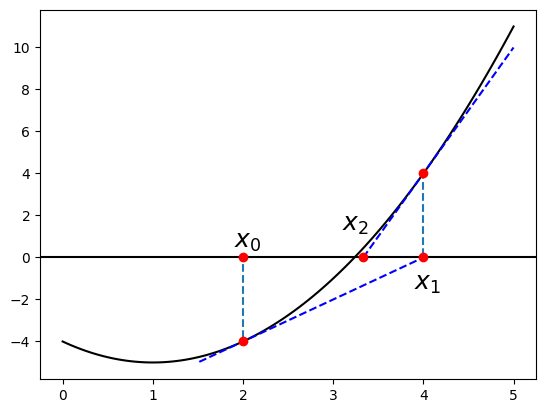

In [5]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**2-2*x-4
l1 = lambda x: 2*x-8
l2 = lambda x: 6*x-20

x = np.linspace(0,5,100)

plt.plot(x,f(x),'black')
plt.plot(x[30:80],l1(x[30:80]),'blue', linestyle = '--')
plt.plot(x[66:],l2(x[66:]),'blue', linestyle = '--')

l = plt.axhline(y=0,xmin=0,xmax=1,color = 'black')
l = plt.axvline(x=2,ymin=2.0/18,ymax=6.0/18, linestyle = '--')
l = plt.axvline(x=4,ymin=6.0/18,ymax=10.0/18, linestyle = '--')

plt.text(1.9,0.5,r"$x_0$", fontsize = 18)
plt.text(3.9,-1.5,r"$x_1$", fontsize = 18)
plt.text(3.1,1.3,r"$x_2$", fontsize = 18)

plt.plot(2,0,marker = 'o', color = 'r' )
plt.plot(2,-4,marker = 'o', color = 'r' )
plt.plot(4,0,marker = 'o', color = 'r' )
plt.plot(4,4,marker = 'o', color = 'r' )
plt.plot(10.0/3,0,marker = 'o', color = 'r' )
plt.show()

我们要猜$f(x)=x^2-2x-4=0$的解，从$x_0=4$的初始猜测值开始，找到$f(x)$在$x=x_0$处的切线$y=2x-8$，找到其与$y=0$的交点$(4, 0)$，将该交点更新为新的猜测的解$x_1=4$ ，如此循环。

如下定义牛顿迭代法：

In [12]:
import sympy
from sympy.abc import x

def NewTon(f, s = 1, maxiter = 100, prt_step = False):
    for i in range(maxiter):
     # 相较于f.evalf(subs={x:s}),subs()是更好的将值带入并计算的方法。
        s = s - f.subs(x,s)/f.diff().subs(x,s)
        if prt_step == True:
            print("After {0} iteration, the solution is updated to{1}".format(i+1,s))
    return s


f = x**2-2*x-4
print(NewTon(f, s = 2, maxiter = 4, prt_step = True))

After 1 iteration, the solution is updated to4
After 2 iteration, the solution is updated to10/3
After 3 iteration, the solution is updated to68/21
After 4 iteration, the solution is updated to3194/987
3194/987


Sympy可以帮助我们求解方程

In [14]:
sympy.solve(f,x)

[1 - sqrt(5), 1 + sqrt(5)]

***

## <a id='toc1_6_'></a>[优化](#toc0_)
### <a id='toc1_6_1_'></a>[高阶导数(Higher Derivatives)](#toc0_)
高阶导数的递归式定义为:

函数$f(x)$的$n$阶导数$f^{(n)}(x)$（或记为$\frac{\mathrm{d}^n}{dx^n}(f)$）为：
$$f^{(n)}(x)=\frac{\mathrm{d}}{\mathrm{d}x}f^{(n-1)}(x)
$$
如果将求导数$\frac{\mathrm{d}}{\mathrm{d}x}$看作是一个运算符，则相当于反复对运算的结果使用$n$次运算符：
$$(\frac{\mathrm{d}}{\mathrm{d}x})^nf=\frac{\mathrm{d}^n}{\mathrm{d}x^n}f
$$

In [15]:
from sympy.abc import x
from sympy.abc import y

f = x**2*y-2*x*y
# 求关于x的二次导数
print(f.diff(x,2))
# 等同于反复关于x求两次导数
print(f.diff(x).diff(x))
# 先求关于x的导数，再求关于y的导数
print(f.diff(x,y))

2*y
2*y
2*(x - 1)


### <a id='toc1_6_2_'></a>[优化问题(Optimization Problem)](#toc0_)
很多时候，我们用函数来描述我们关心的问题,例如：

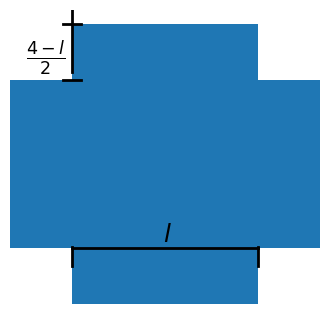

In [27]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(4,4))
plt.axis('off')

plt.axhspan(0,1,0.2,0.8,ec = "none")
plt.axhspan(0.2,0.8,0,0.2,ec = "none")
plt.axhspan(0.2,0.8,0.8,1,ec = "none")

plt.axhline(0.2,0.2,0.8,linewidth = 2, color = 'black')
plt.axvline(0.2,0.17,0.23,linewidth = 2, color = 'black')
plt.axvline(0.8,0.17,0.23,linewidth = 2, color = 'black')

plt.axvline(0.2,0.8,1,linewidth = 2, color = 'black')
plt.axhline(0.8,0.17,0.23,linewidth = 2, color = 'black')
plt.axhline(1,0.17,0.23,linewidth = 2, color = 'black')

plt.text(0.495,0.22,r"$l$", fontsize = 18,color="black")
plt.text(0.05,0.85,r"$\frac{4-l}{2}$", fontsize = 18,color="black")

plt.show()

用一张给定边长$4$的正方形纸来折一个没有盖的纸盒，设纸盒的底部边长为$l$，纸盒的高为$\frac{4-l}{2}$，那么纸盒的体积为：
$$V(l)=l^2\frac{4-l}{2}
$$
我们会希望知道怎样才能使得纸盒的容积最大，也就是关心在$l>0,4-l>0$的限制条件下，函数$V(l)$的最大值是多少。

优化问题关心的就是这样的问题，在满足限制条件的前提之下，怎样能够使我们的目标函数最大（或最小）。

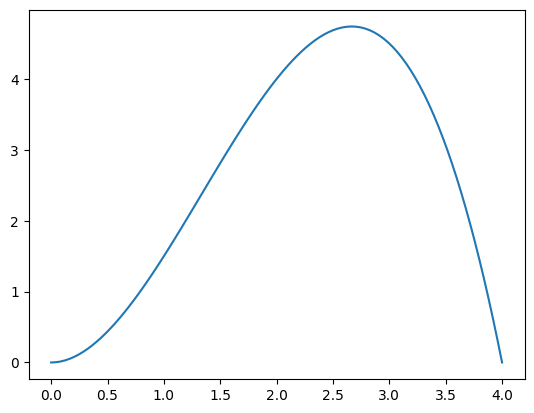

In [28]:
import numpy as np

l = np.linspace(0,4,100)
V = lambda l: 0.5*l**2*(4-l)
plt.plot(l,V(l))

通过观察函数图，不难看出，在$l$的值大约在2.5往上去一点的位置处，获得的纸盒的体积最大。

### <a id='toc1_6_3_'></a>[关键点(Critical Points)](#toc0_)
通过导数一节，我们知道一个函数在某处的导数所描述的是：当输入值在该位置附
近变化时，函数值所发生的相应变化。

因此，如果给定一个函数$f$，如果知道在点$x=a$处函数的导数不为$0$，则在该点出稍微改变函数的输入值，函数值都会变化，这表示函数在该点的函数值即不可能是局部最大值，也不可能是局部最小值。相反，如果函数$f$在点$x=a$处函数的导数为$0$，或者该点出的导数不存在则称这个点就被称为关键点。

要想知道一个$f'(a)=0$的关键点处，函数值$f(a)$是一个局部最大值还是局部
最小值，可以使用二次导数测试：
* 如果$f''(a)>0$，则函数$f$在$a$处的函数值是局部最小值
* 如果$f''(a)<0$，则函数$f$在$a$处的函数值是局部最大值
* 如果$f''(a)=0$，则测试无法告诉我们结论

二次导数测试在中学书本中，大多是要求不求甚解地记忆的规则，其实理解起来非
常容易。二次导数测试中涉及到函数在某一点处的函数值、一次导数和二次导数，
于是想$f(x)$在$x=a$处的泰勒级数：
$$f(x)=f(a)+f'(a)(x-a)+\frac{1}{2}f''(a)(x-a)^2+\cdots
$$
因为$a$为关键点，$f'(a)=0$，因而：
$$f(x)=f(a)+\frac{1}{2}f''(a)(x-a)^2+O(x^3)
$$
表明$f''(a)\neq 0$时，函数$f(x)$在$x=a$附近的表现近似于二次函数，二次
项的系数$\frac{1}{2}f''(a)$决定了抛物线的开口朝向，因而决定了函数值在该点是怎样的。

回到之前的求最大盒子体积的优化问题，解法如下：

In [29]:
from sympy.abc import l

V = 0.5*l**2*(4-l)
# 看看一次导函数：
print(V.diff(l))
# 一次导函数的定义域为(-oo,oo),因此关键点为V'(l)=0的根
cp = sympy.solve(V.diff(l),l)
print(cp)
# 找到关键点后，使用二次导数测试：
for p in cp:
    print(V.diff(l,2).subs(l,p))
# 因此知道在l=2.666666处时，纸盒的体积最大

-0.5*l**2 + 1.0*l*(4 - l)
[0.0, 2.66666666666667]
4.00000000000000
-4.00000000000000


### <a id='toc1_6_4_'></a>[线性回归(Linear Regression)](#toc0_)
二维平面上有$n$个数据点，$p_i=(x_i, y_i)$，现尝试找到一条经过原点的直线$y=ax$，使得所有数据点到该直线的残差（数据点和回归直线之间的水平距离）的平方和最小。

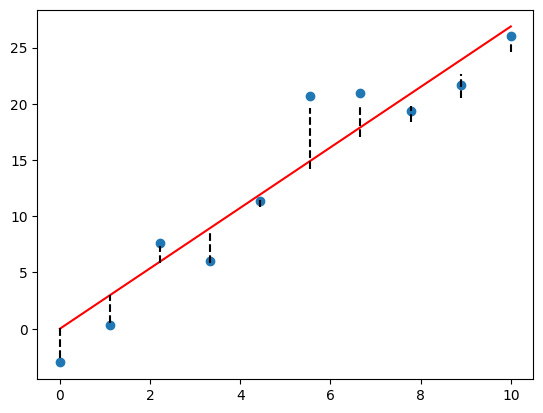

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 设定好随机函数种子，确保模拟数据的可重现性
np.random.seed(123)

# 随机生成一些带误差的数据
x = np.linspace(0,10,10)
res = np.random.randint(-5,5,10)
y = 3*x + res

# 求解回归线的系数
a = sum(x*y)/sum(x**2)

# 绘图
plt.plot(x,y,'o')
plt.plot(x,a*x,'red')
for i in range(len(x)):
    plt.axvline(x[i],min((a*x[i]+5)/35.0,(y[i]+5)/35.0),\
    max((a*x[i]+5)/35.0,(y[i]+5)/35.0),linestyle = '--',
color = 'black')

要找到这样一条直线，实际上是一个优化问题：
$$\mathop{min}\limits_{a}(Err(a))=\sum_i(y_i-ax_i)^2$$
要找出函数$\mathop{min}\limits_{a}(Err(a))$的最小值，首先计算一次导函数：
$$\begin{split}\frac{\mathrm{d}Err}{\mathrm{d}a}
&=\sum_i2(y_i-ax_i)(-x_i) \\
&=-2\sum_ix_iy_i+2a\sum_ix_i^2
\end{split}$$
令该函数为$0$，求解出关键点：$a=\frac{\sum_ix_iy_i}{\sum_ix_i^2}$

使用二次导数测试：
$$\frac{\mathrm{d}^2Err}{\mathrm{d}a^2}=2\sum_ix_i^2>0
$$
因此$a=\frac{\sum_ix_iy_i}{\sum_ix_i^2}$是能够使得函数值最小的输入。

这也是上面Python代码中，求解回归线斜率所用的计算方式。

如果我们不限定直线一定经过原点，即公式为$y=ax+b$，则同样还是一个优
化问题，只不过涉及的变量变成2个而已：
$$\mathop{min}\limits_{a}Err(a, b)=\sum_i(y_i-ax_i-b)^2
$$
这个问题就是多元微积分里所要分析的问题了。
虽然在第二部分才会介绍具体解法，这里先给出一种Python中的求解方法:

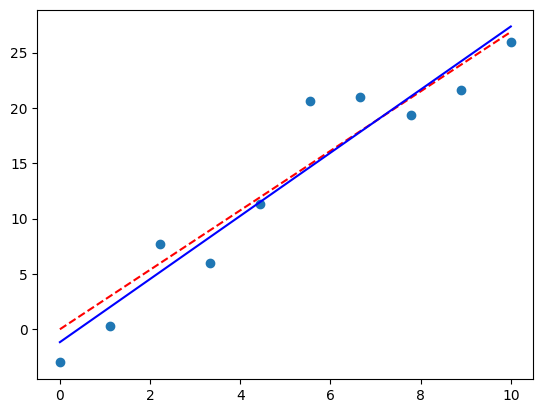

In [2]:
slope, intercept = np.polyfit(x,y,1)
plt.plot(x,y,'o')
plt.plot(x,a*x,'red', linestyle = '--')
plt.plot(x,slope*x+intercept, 'blue')

***

## <a id='toc1_7_'></a>[不定积分](#toc0_)
### <a id='toc1_7_1_'></a>[常微分方程(Ordinary Differential Equations,ODE)](#toc0_)
我们观察一辆行驶中的汽车，假设我们发现函数$a(t)$能够很好地描述这辆汽车在各个时刻的加速度，因为对速度的时间函数求导可以得到加速度的时间函数，如果我们希望根据$a(t)$求出$v(t)$，很自然会得出下面这个方程：
$$\frac{\mathrm{d}v}{\mathrm{d}t}=a(t)
$$
如果我们能够找到一个函数$v(t)$满足：$\frac{\mathrm{d}v}{\mathrm{d}t}=a(t)$，那么$v(t)$就是上面方程的解之一。因为对于常数项求导的结果是0，一旦我们找到了一个$v(t)$是方程的解，那么$\forall C\in R,v(t)+C$也都是方程的解，因此常微分方程的解是$v(t)+C$这样的一系列函数。

在得出这一系列函数后，我们只需要知道任意一个时刻里汽车行驶的速度，便可以
求解出常数项$C$，因而得到最终想求的速度时间函数。

如果我们沿用导数是函数在某个位置的切线斜率的解读去看上面的常微分方程，就
像是我们知道了一个函数在各个位置的切线斜率，反过来求这个函数一样。

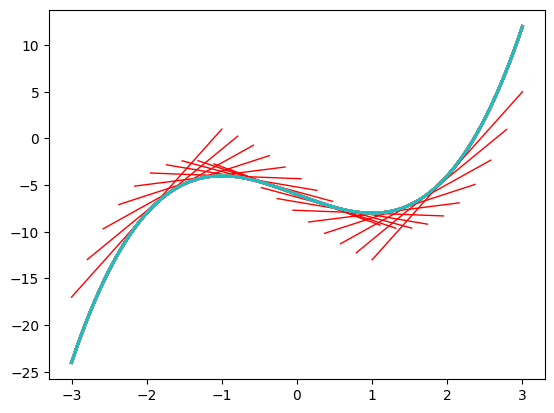

In [18]:
import sympy

t = sympy.Symbol('t')
c = sympy.Symbol('c')
domain = np.linspace(-3,3,100)
v = t**3-3*t-6
a = v.diff()

for p in np.linspace(-2,2,20):
    slope = a.subs(t,p)
    intercept = sympy.solve(slope*p+c-v.subs(t,p),c)[0]
    lindomain = np.linspace(p-1,p+1,20)
    plt.plot(lindomain,slope*lindomain+intercept,'red',linewidth = 1)
    plt.plot(domain,[v.subs(t,i) for i in domain],linewidth = 2)

### <a id='toc1_7_2_'></a>[不定积分(Indefinite Integral)](#toc0_)
如果我们将求导看作一个高阶函数，输入进一个函数，求导后得到一个新的函数。那么不定积分可以被视为是对应的反函数”，$F'(x)=f(x)$， 则$\int f(x)\mathrm{d}x=F(x)+C$。写成类似反函数之间复合的形式有：
$$\int ((\frac{\mathrm{d}}{\mathrm{d}x}F(x))\mathrm{d}x)=F(x)+C
$$
其中$C$为常数。

积分的规则和技巧，例如换元积分、分部积分等就累给读者去回顾吧，这里仅介绍
下Python中的方法。

In [19]:
print(a.integrate())
print(sympy.integrate(sympy.E**t+3*t**2))


t**3 - 3*t
t**3 + exp(t)
